# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.183  1  0.312 0.577 0.002   
                             age        0.055  1  0.094 0.759 0.000   
                             Kiel       1.926  1  3.294 0.071 0.017   
                             Magdeburg  5.451  1  9.324 0.003 0.047   
                             Sweden     8.872  1 15.177 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.675  1  0.681 0.410 0.004   
                             age        0.615  1  0.621 0.432 0.003   
                             Kiel       0.262  1  0.264 0.608 0.001   
                             Magdeburg  1.242  1  1.254 0.264 0.007   
                             Sweden    21.456  1 21.672 0.000 0.102   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.239  0.718    False  
                             age               0.120  0.852    False  
                             Kiel              1.148  0.160    False  
                             Magdeburg         2.588  0.011     True  
                             Sweden            3.869  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.387  0.576    False  
                             age               0.365  0.595    False  
                             Kiel              0.216  0.740    False  
                             Magdeburg         0.578  0.427    False  
                             Sweden            5.219  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.125  1  7.930 0.005 0.040   
                             age        0.003  1  0.022 0.882 0.000   
                             Kiel       0.286  1  2.016 0.157 0.010   
                             Magdeburg  0.531  1  3.740 0.055 0.019   
                             Sweden     1.876  1 13.223 0.000 0.065   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.859  1  3.757 0.054 0.019   
                             age        0.636  1  1.286 0.258 0.007   
                             Kiel       2.258  1  4.563 0.034 0.023   
                             Magdeburg  2.004  1  4.049 0.046 0.021   
                             Sweden    24.285  1 49.073 0.000 0.204   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.270  0.016     True  
                             age               0.055  0.926    False  
                             Kiel              0.803  0.260    False  
                             Magdeburg         1.263  0.112    False  
                             Sweden            3.449  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.267  0.111    False  
                             age               0.588  0.383    False  
                             Kiel              1.469  0.075    False  
                             Magdeburg         1.341  0.097    False  
                             Sweden           10.387  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.270  0.016     True   
                             age       0.882         0.055  0.926    False   
                             Kiel      0.157         0.803  0.260    False   
                             Magdeburg 0.055         1.263  0.112    False   
                             Sweden    0.000         3.449  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.054         1.267  0.111    False   
                             age       0.258         0.588  0.383    False   
                             Kiel      0.034         1.469  0.075    False   
                             Magdeburg 0.046         1.341  0.097    False   
                             Sweden    0.000        10.387  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.577         0.239  0.718    False  
                             age       0.759         0.120  0.852    False  
                             Kiel      0.071         1.148  0.160    False  
                             Magdeburg 0.003         2.588  0.011     True  
                             Sweden    0.000         3.869  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.410         0.387  0.576    False  
                             age       0.432         0.365  0.595    False  
                             Kiel      0.608         0.216  0.740    False  
                             Magdeburg 0.264         0.578  0.427    False  
                             Sweden    0.000         5.219  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.284     0.278     0.262         2.481     0.340
std       0.294         6.200     0.320     0.304         5.346     0.333
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.413     0.002     0.004         0.324     0.015
50%       0.062         1.206     0.125     0.120         0.921     0.240
75%       0.386         3.280     0.515     0.474         2.420     0.632
max       0.999        86.259     0.999     1.000       147.271     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.270   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.490   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.137         0.863   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.246         0.609   
A0A075B6H7                                         AD     0.005         2.327   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.173         0.761   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.445         0.351   
S4R3U6                                             AD     0.054         1.267   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True   
A0A024R0T9;K7ER74;P02655                           AD      0.072    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.233    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.370    False   
A0A075B6H7                                         AD      0.014     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.284    False   
Q9Y6X5                                             AD      0.281    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.573    False   
S4R3U6                                             AD      0.111    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.577         0.239   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.371   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.127         0.896   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.536         0.271   
A0A075B6H7                                         AD     0.157         0.805   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.016         1.785   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.226         0.646   
S4R3U6                                             AD     0.410         0.387   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.718    False  
A0A024R0T9;K7ER74;P02655                           AD      0.107    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.250    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.685    False  
A0A075B6H7                                         AD      0.290    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.235         1.619     0.294     0.253         1.407     0.336
std       0.290         1.869     0.313     0.289         1.631     0.317
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.007         0.385     0.019     0.012         0.355     0.038
50%       0.082         1.086     0.155     0.123         0.908     0.245
75%       0.412         2.172     0.542     0.441         1.931     0.604
max       0.997        20.139     0.998     0.998        22.210     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,941,1032


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.270  0.016   
A0A024R0T9;K7ER74;P02655                           0.032         1.490  0.072   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.137         0.863  0.233   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.246         0.609  0.370   
A0A075B6H7                                         0.005         2.327  0.014   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.284   
Q9Y6X5                                             0.173         0.761  0.281   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.445         0.351  0.573   
S4R3U6                                             0.054         1.267  0.111   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.577   
A0A024R0T9;K7ER74;P02655                              False 0.043   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.127   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.536   
A0A075B6H7                                             True 0.157   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.016   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.226   
S4R3U6                                                False 0.410   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.239  0.718   
A0A024R0T9;K7ER74;P02655                                   1.371  0.107   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.896  0.250   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.271  0.685   
A0A075B6H7                                                 0.805  0.290   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.785  0.050   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.646  0.380   
S4R3U6                                                     0.387  0.576   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    884
CF (yes) - PI (yes)   332
CF (yes) - PI (no)    148
CF (no)  - PI (yes)    57
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.005         2.270  0.016     True 0.577   
A0A075B6H7                   0.005         2.327  0.014     True 0.157   
A0A075B6H9                   0.021         1.683  0.050     True 0.406   
A0A075B6I0                   0.001         3.101  0.003     True 0.029   
A0A075B6R2                   0.002         2.745  0.006     True 0.292   
...                            ...           ...    ...      ...   ...   
Q9UP79                       0.000         4.177  0.000     True 0.392   
Q9UQ52                       0.000         3.591  0.001     True 0.077   
Q9Y281;Q9Y281-3              0.001         2.877  0.005     True 0.350   
Q9Y6C2                       0.013         1.882  0.034     True 0.454   
Q9Y6X5                       0.173         0.761  0.281    False 0.016   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.239  0.718    False       186  
A0A075B6H7                           0.805  0.290    False        91  
A0A075B6H9                           0.392  0.571    False       189  
A0A075B6I0                           1.540  0.079    False       194  
A0A075B6R2                           0.535  0.458    False       164  
...                                    ...    ...      ...       ...  
Q9UP79                               0.407  0.558    False       135  
Q9UQ52                               1.116  0.169    False       188  
Q9Y281;Q9Y281-3                      0.456  0.517    False        51  
Q9Y6C2                               0.343  0.613    False       119  
Q9Y6X5                               1.785  0.050     True       173  

[205 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.016,0.718,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.072,0.107,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.233,0.250,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.370,0.685,196,CF (no) - PI (no)
A0A075B6H7,0.014,0.290,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.284,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.281,0.050,173,CF (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.181,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E9PKE3;P11142,0.962,0.012,158,CF (no) - PI (yes),0.949
Q9H8J5,0.949,0.000,173,CF (no) - PI (yes),0.949
P43004;P43004-2;P43004-3,0.005,0.941,89,CF (yes) - PI (no),0.935
B1ALD9;Q15063;Q15063-3;Q15063-5,0.029,0.961,69,CF (yes) - PI (no),0.932
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.917,134,CF (yes) - PI (no),0.917
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.045,0.055,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.052,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


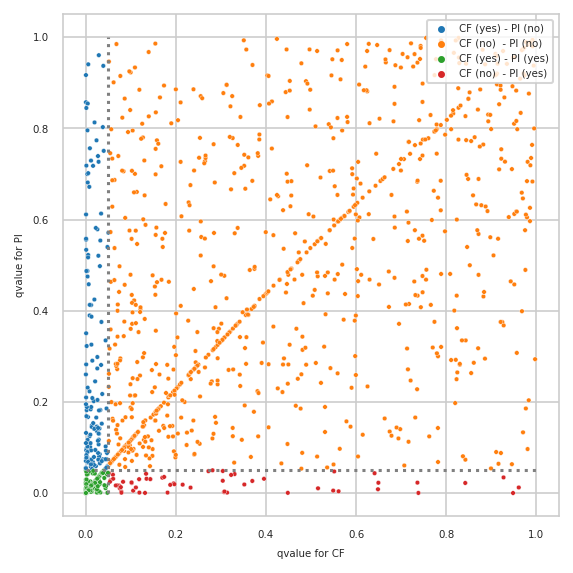

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


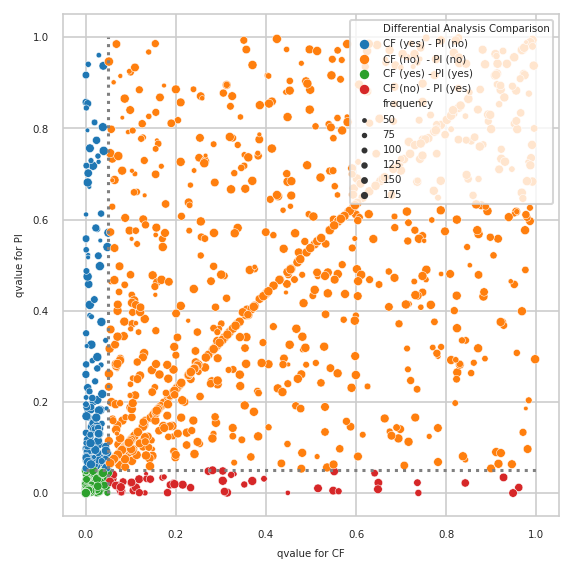

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out